## <b> Caminhadas Aleatorias </b>

 Alunos:
 
 Alexis Mariz - 2019006337
 
 Joao Pedro Fernandes - 2019006760

In [6]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
#Definindo a funcao para gerar caminhadas aleatorias
def random_walk(N, d):
    steps = np.random.uniform(-0.5, 0.5, size=(N, d))
    
    positions = np.cumsum(steps, axis=0)
    
    return positions

In [8]:
def plot_random_walk(positions, title):
    t = np.arange(1, len(positions) + 1)
    x = np.linalg.norm(positions, axis=1)  # Calcula a norma Euclidiana para d=2
    
    plt.plot(t, x, label=f'{title}')

## Avaliando o comportamento de 5 caminhadas aleatorias diferentes com 10.000 passos

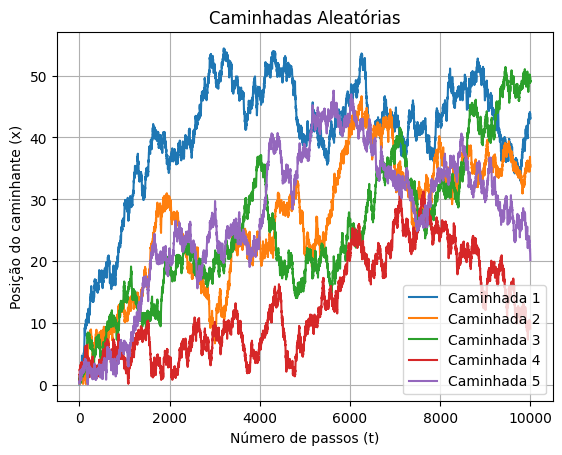

In [9]:
# Parâmetros
N = 10000  # Número de passos
d = 2  # Dimensões (1 ou 2)
num_walks = 5  # Número de caminhadas a serem plotadas

# Gera e plota caminhadas aleatórias
for i in range(num_walks):
    positions = random_walk(N, d)
    plot_random_walk(positions, f'Caminhada {i+1}')

# Adiciona legendas e configurações do gráfico
plt.xlabel('Número de passos (t)')
plt.ylabel('Posição do caminhante (x)')
plt.title('Caminhadas Aleatórias')
plt.legend()
plt.grid(True)
plt.show()

4 das 5 caminhadas tiveram comportamento parecido (com valores finais entre 40 e 60), porém é importante ressaltar que as caminhadas 2 e 1 (mesmo que a caminhada 1 tenha finalizado nesta faixa de valor), demonstraram um comportamento destoante das demais caminhadas no decorrer do experimento.

A diferença média entre os caminhos parece crescer com em função do numero de passos.

## Avaliando comportamento de X / Y e efeito do número de passos na distancia final.

In [10]:
# Definindo o método para plotar o gráfico XY
def plot_random_walk_XY(positions_list, titles, xlabel, ylabel, title):
    plt.figure(figsize=(8, 8))  # Define o tamanho da figura
    
    for positions, title in zip(positions_list, titles):
        x = positions[:, 0]
        y = positions[:, 1]
        plt.plot(x, y, label=f'{title}')

    # Adiciona legendas e configurações do gráfico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Mantém a razão de aspecto do gráfico XY
    plt.show()

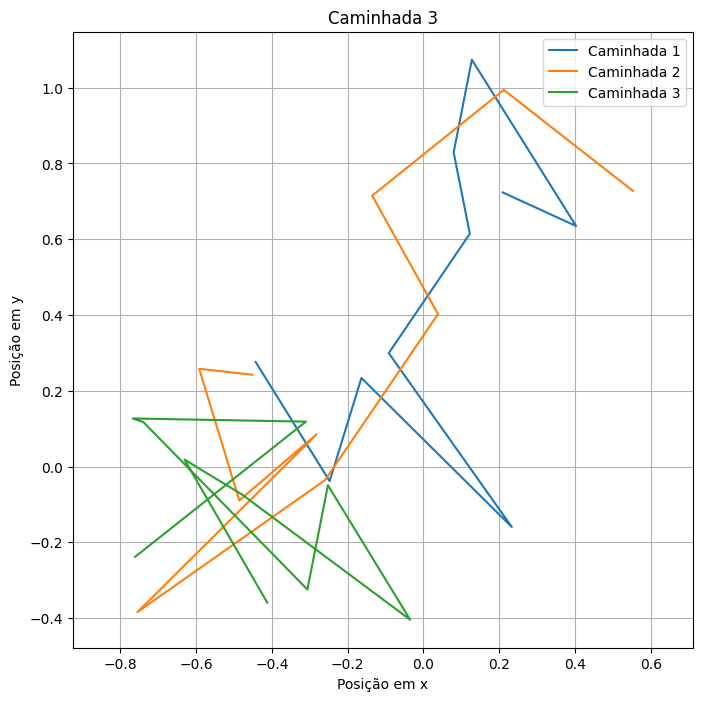

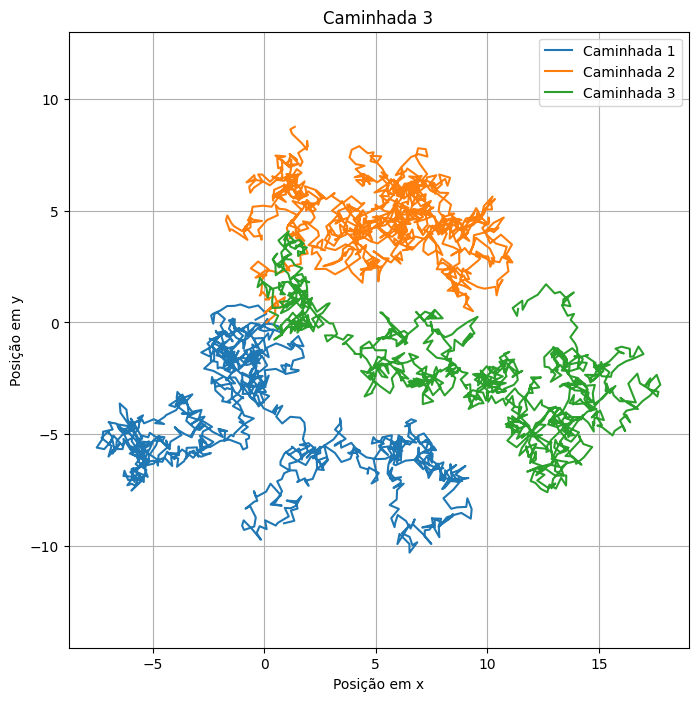

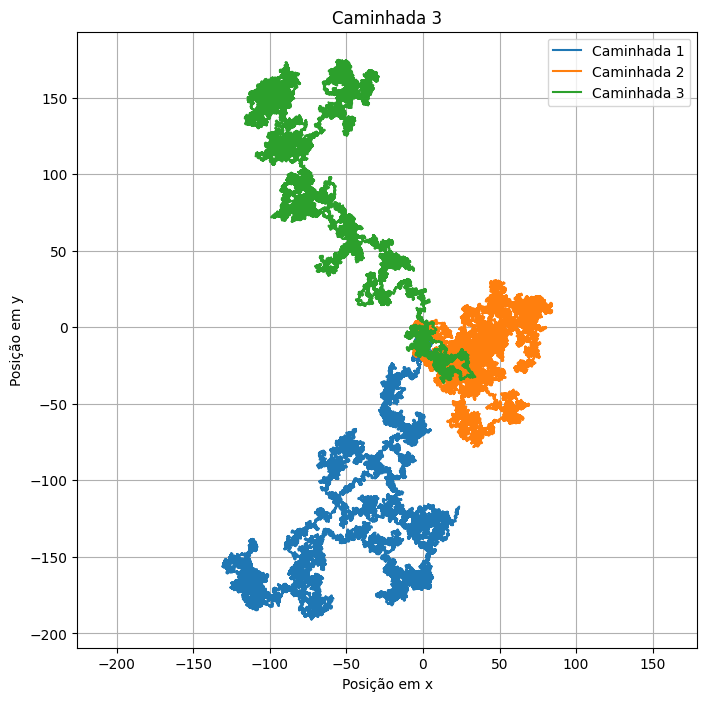

In [11]:
Ns_values = [10, 1000, 100000]

for n in Ns_values:
    positions_list = [random_walk(n, d=2) for _ in range(3)]
    titles = [f'Caminhada {i+1}' for i in range(3)]
    plot_random_walk_XY(positions_list, titles, 'Posição em x', 'Posição em y', f'Caminhadas Aleatórias (N = {n})')

Visualmente é possível observar que a distância aumenta sim, de uma distancia aproximada de 10 vezes.

## Analise de pontos finais de caminhadas aleatorias

In [12]:
#Define funcao para retornar a ultima posicao de caminhadas aleatorias
def random_walk_final_positions(W, N, d):
    final_positions = np.zeros((W, d))

    for i in range(W):
        walk = np.random.uniform(-0.5, 0.5, size=(N, d))
        final_positions[i] = np.sum(walk, axis=0)

    return final_positions

def plot_scatter(final_positions, title, alph = 0.1):
    plt.scatter(final_positions[:, 0], final_positions[:, 1], label=title, alpha=alph)
    plt.xlabel('Posição final em x')
    plt.ylabel('Posição final em y')
    plt.title('Dispersão das Coordenadas Finais de Caminhadas Aleatórias')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Mantém a razão de aspecto do gráfico XY

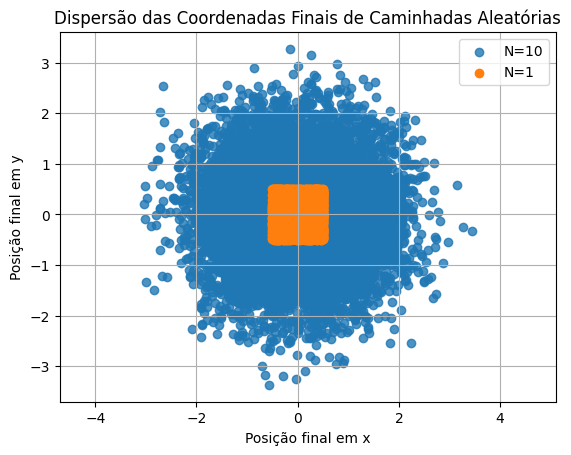

In [13]:
# Parâmetros
W = 10000  # Número de caminhadas aleatórias
Ns = [10, 1]  # Número de passos

# Gera e plota caminhadas aleatórias para diferentes N
for N in Ns:
    final_positions = random_walk_final_positions(W, N, d=2)
    if N == 1:
        plot_scatter(final_positions, f'N={N}', alph=1)
    else:
        plot_scatter(final_positions, f'N={N}', alph=0.8)

plt.show()

Em maior escala, o ponto final de uma caminhada aleatoria parece ter o padrão circular.

## A partir de qual N, a distribuicao gaussiana é uma boa aproximacao?

In [14]:
def plot_histogram(final_positions, N, sigma):
    plt.hist(final_positions, bins=50, density=True, alpha=0.6, color='g', label=f'N={N} Caminhadas')
    
    mu = 0 
    x = np.linspace(-3 * sigma, 3 * sigma, 100)
    gaussian_prediction = norm.pdf(x, mu, sigma)
    
    plt.plot(x, gaussian_prediction, 'r')
    
    plt.xlabel('Posição final')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True)
    plt.show()


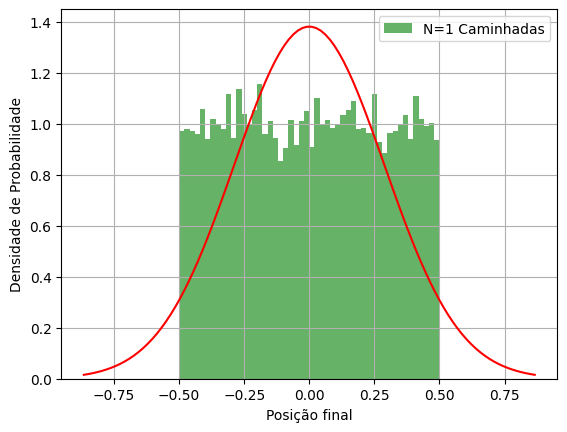

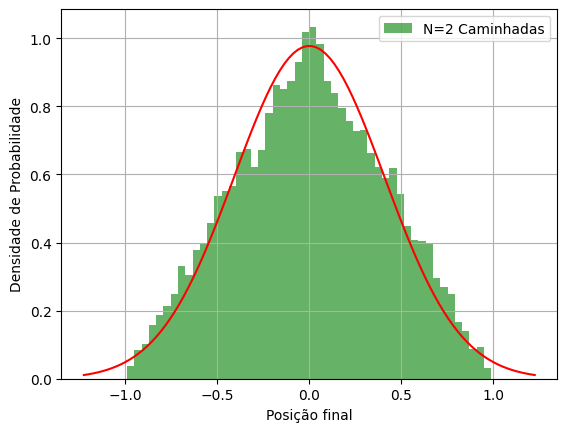

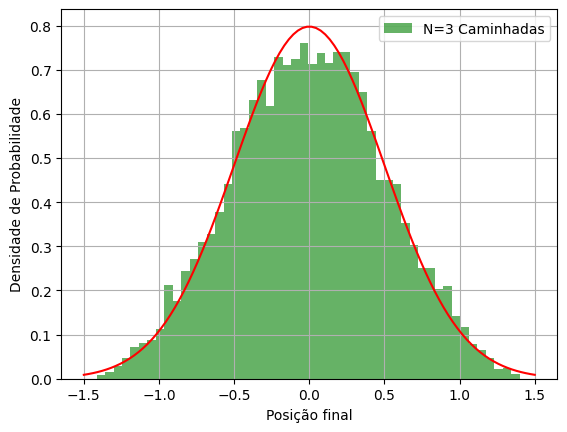

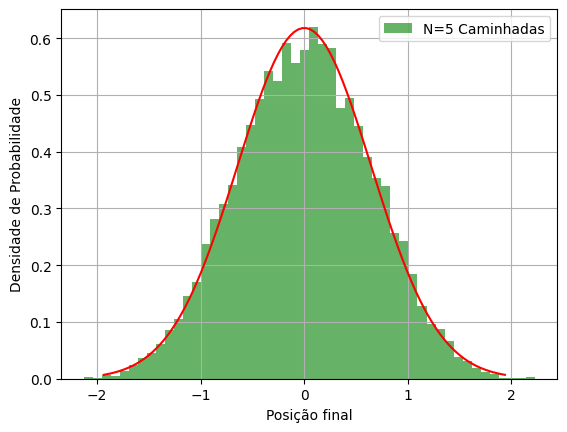

In [15]:

# Parâmetros
W = 10000  # Número de caminhadas aleatórias
Ns = [1, 2, 3, 5]  # Número de passos

# Calcula e plota histogramas para diferentes N
for N in Ns:
    final_positions = random_walk_final_positions(W, N, d=1)
    sigma = np.sqrt(N / 12)  # Desvio padrão esperado para N passos em uma dimensão
    plot_histogram(final_positions, N, sigma)


Pode-se observar que rapidamente a distribuição gaussiana se torna uma boa aproximação para os pontos finais de uma caminhada aleatória. Com N = 5 já é possível afirmar que houve uma ótima aproximação. Essa aproximação é esperada, uma vez que o ponto final de uma caminhada, é a soma de V.A. independentes(os passos dados em cada iteração), e pelo TCL a soma de V.A. IID's, são aproximadamente Gaussianas.